In [38]:
 pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11973 sha256=ab9ed90f7ad5382839d4486df69c85c3933c3de8e42ad58ee56c98fc6a191715
  Stored in directory: /root/.cache/pip/wheels/dd/dc/1c/c472efa84814edbb5b67d132ad3950534d0d7fd808543a659c
Successfully built empiricaldist


In [39]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 8.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=5db3d3138ea0185be9912ec11bcccd75f8d3a662924efa9a19ad314005c3ea8d
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [43]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.3 MB/s 
     |████████████████████████████████| 16.7 MB 27.8 MB/s 
     |████████████████████████████████| 6.3 MB 15.6 MB/s 


In [44]:
pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from empiricaldist import Pmf
from empiricaldist import Cdf

In [45]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
import pycountry
import geopandas

Data source:

https://www.ctdatacollaborative.org/global-synthetic-dataset

# Load the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Project Directory path 
project_dir = 'drive/MyDrive/DAB103-new/'
ctdc = pd.read_csv(project_dir+ 'CTDC.tsv',sep='\t')
ctdc

Mounted at /content/drive


,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,...,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
0,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ctdc.duplicated().any()

True

In [5]:
ctdc.duplicated().sum()

132164

In [6]:
ctdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193051 entries, 0 to 193050
Data columns (total 37 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   yearOfRegistration                    153740 non-null  float64
 1   gender                                145930 non-null  object 
 2   ageBroad                              102270 non-null  object 
 3   majorityStatusAtExploit               40280 non-null   object 
 4   traffickMonths                        20720 non-null   object 
 5   citizenship                           104600 non-null  object 
 6   CountryOfExploitation                 125690 non-null  object 
 7   meansOfControlDebtBondage             10200 non-null   float64
 8   meansOfControlTakesEarnings           20810 non-null   float64
 9   meansOfControlThreats                 25140 non-null   float64
 10  meansOfControlPsychologicalAbuse      26290 non-null   float64
 11  

In [7]:
def FindMissingColsPercentage(df):

    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum / total
        pct = df[col].isnull().mean() * 100 
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals
    
    if total == 0:
        print("no missing values")

In [8]:
FindMissingColsPercentage(ctdc)

yearOfRegistration => 39311 [20.36%]
gender => 47121 [24.41%]
ageBroad => 90781 [47.02%]
majorityStatusAtExploit => 152771 [79.14%]
traffickMonths => 172331 [89.27%]
citizenship => 88451 [45.82%]
CountryOfExploitation => 67361 [34.89%]
meansOfControlDebtBondage => 182851 [94.72%]
meansOfControlTakesEarnings => 172241 [89.22%]
meansOfControlThreats => 167911 [86.98%]
meansOfControlPsychologicalAbuse => 166761 [86.38%]
meansOfControlPhysicalAbuse => 174541 [90.41%]
meansOfControlSexualAbuse => 184251 [95.44%]
meansOfControlFalsePromises => 174391 [90.33%]
meansOfControlPsychoactiveSubstances => 184541 [95.59%]
meansOfControlRestrictsMovement => 168551 [87.31%]
meansOfControlRestrictsMedicalCare => 185031 [95.85%]
meansOfControlExcessiveWorkingHours => 176641 [91.5%]
meansOfControlThreatOfLawEnforce => 184001 [95.31%]
meansOfControlWithholdsNecessities => 181471 [94.0%]
meansOfControlWithholdsDocuments => 179171 [92.81%]
meansOfControlOther => 180221 [93.35%]
isForcedLabour => 150711 [78.

In [9]:
#describe columns of object type
ctdc.describe(include=['O'])

,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation
count,145930,102270,40280,20720,104600,125690
unique,3,9,2,4,128,141
top,Female,30--38,Minor,0--12 (0-1 yr),UKR,USA
freq,105990,19230,20660,9000,18480,65880


In [10]:
#Drop only if entire row has NaN values
ctdc = ctdc.dropna(how='all')

In [11]:
ctdc.shape

(193025, 37)

# Simple Exporatory Data Analysis (EDA)

In [12]:
ctdc.head(10)

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,...,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
0,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [13]:
ctdc.tail(10)

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,...,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
193015,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193016,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193017,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193018,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193019,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193020,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193021,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193022,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193023,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193024,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ctdc.sample(5)

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,...,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
124608,2006.0,NaN,24--26,NaN,NaN,BLR,POL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134743,2014.0,Female,18--20,NaN,NaN,MDA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11119,2017.0,Female,NaN,NaN,NaN,IDN,ARE,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
39562,2018.0,Male,NaN,NaN,NaN,NaN,USA,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190539,NaN,NaN,NaN,NaN,NaN,LSO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ctdc['yearOfRegistration'].isnull().sum()

39285

In [16]:
#change float column to int column, skip over NaN
ctdc['yearOfRegistration'] = ctdc['yearOfRegistration'].convert_dtypes(convert_integer=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Bar chart code source

https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/#:~:text=Following%20steps%20were%20followed%3A%201%20Define%20the%20x-axis,view%20your%20plot%2C%20we%20use%20.show%20%28%29%20function.

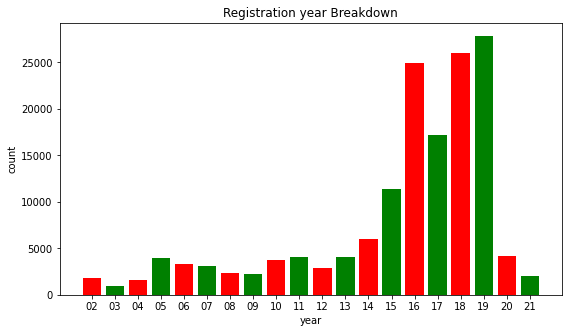

In [17]:
#convert year_num series to a dataframe year_num_df
year_num = ctdc.groupby(['yearOfRegistration']).size()
year_num_df = pd.DataFrame({'year':year_num.index.astype(int), 'num':year_num.values})
year_num_df["year"]

# x-coordinates of left sides of bars 
left = year_num_df["year"]
  
# heights of bars
height = year_num_df["num"]
  
# labels for bars
tick_label = ['02', '03','04','05','06',
              '07', '08','09','10','11',
              '12', '13','14','15','16',
              '17', '18','19','20','21']

#f, ax = plt.subplots(figsize=(18,5))
plt.figure(figsize=(9,5))
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('year')
# naming the y-axis
plt.ylabel('count')
# plot title
plt.title('Registration year Breakdown')
  
# function to show the plot
plt.show()

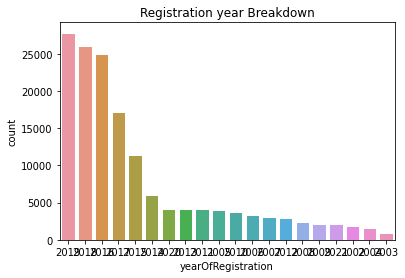

In [18]:
plt.title("Registration year Breakdown")
# order = ctdc['yearOfRegistration'].value_counts(ascending=False).index
# sns.countplot(x='yearOfRegistration', data=ctdc, order=order)

order = ctdc['yearOfRegistration'].value_counts().index
sns.set(rc={"figure.figsize":(15,10)}) 
sns.countplot(x='yearOfRegistration', data=ctdc, order= order)

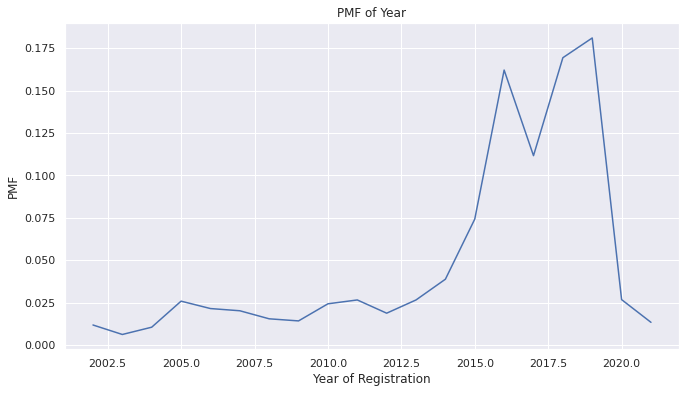

In [46]:
pmf_year_num = Pmf.from_seq(ctdc['yearOfRegistration'], normalize=True)
pmf_year_num.plot()
plt.xlabel('Year of Registration')
plt.ylabel('PMF')
plt.title('PMF of Year')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

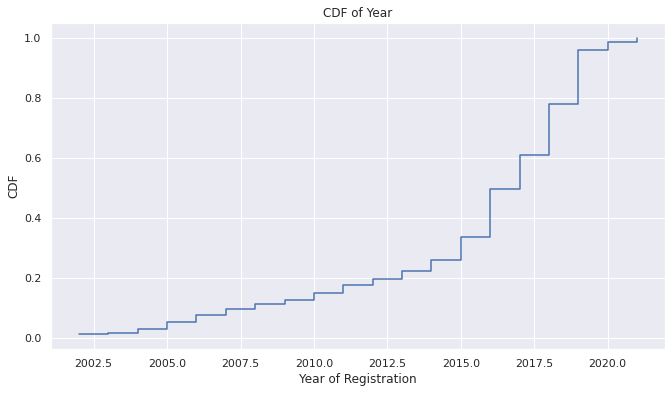

In [47]:
pmf_year_num = Cdf.from_seq(ctdc['yearOfRegistration'])
pmf_year_num.step()
plt.xlabel('Year of Registration')
plt.ylabel('CDF')
plt.title('CDF of Year')
plt.show

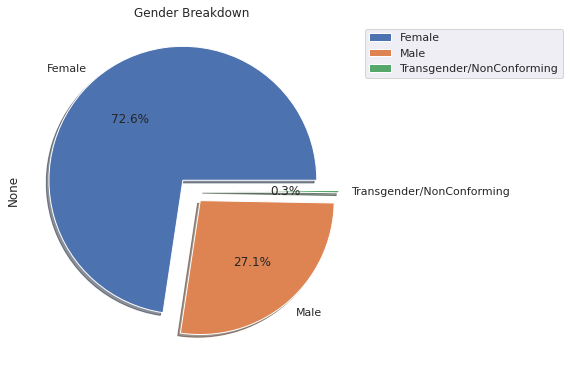

In [49]:
gender_num = ctdc.groupby(['gender']).size(); 
gender_num_chart = gender_num.plot(kind='pie', title='Gender Breakdown', figsize = (6,7), 

             legend = ['Female', 'Male', 'Transgender'], explode = (0.1, 0.1 ,0.1), shadow = True, autopct = '%1.1f%%')
gender_num_chart.legend(bbox_to_anchor = (1, 1))

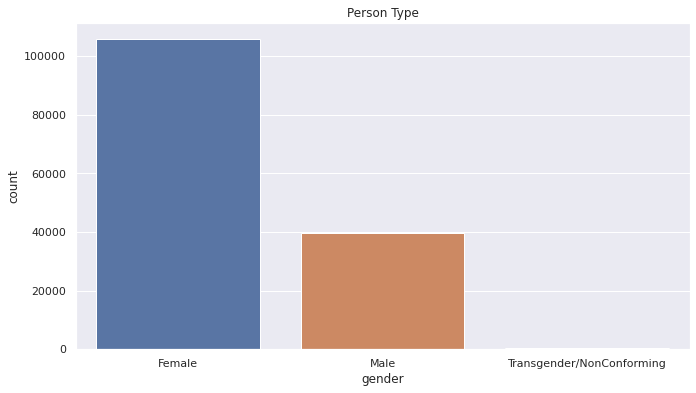

In [50]:
plt.title("Person Type")
order = ctdc['gender'].value_counts(ascending=False).index
sns.countplot(x='gender', data=ctdc, order=order)

In [51]:

ctdc.insert(loc=0, column='row_num', value=np.arange(len(ctdc)))

Text(0.5, 1.0, 'Year counts by Gender')

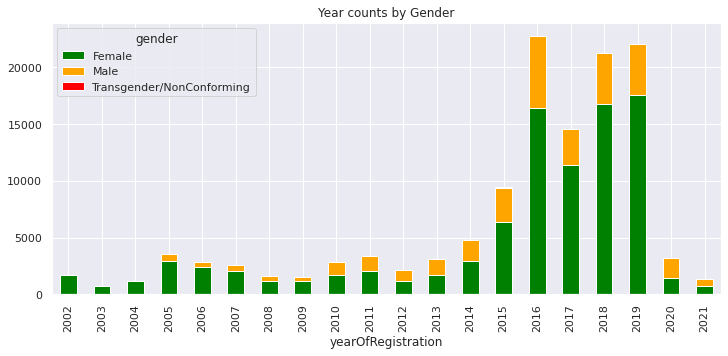

In [52]:
pivot1 = ctdc.pivot_table(index='yearOfRegistration', columns='gender', values='row_num', aggfunc="count")
fig = pivot1.plot(kind="bar", stacked=True, color=["green","orange","red"],figsize=(12,5))
plt.title("Year counts by Gender")

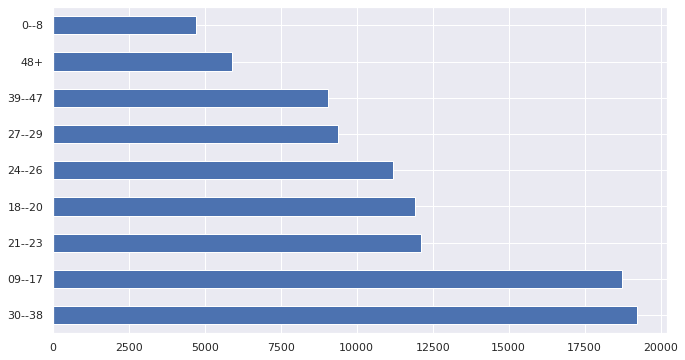

In [53]:
#plot the bar graph of percentage Age Rating categories
ctdc['ageBroad'].value_counts(normalize=False).plot.barh()
plt.show()

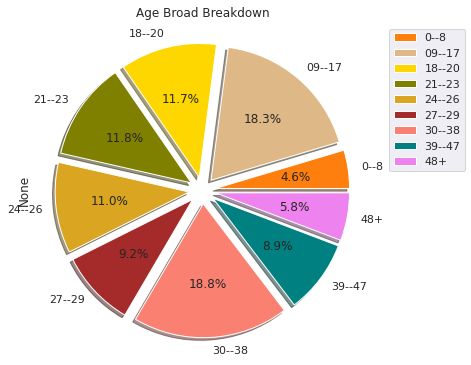

In [54]:
ageBroad_num = ctdc.groupby(['ageBroad']).size(); 
ageBroad_chart = ageBroad_num.plot(kind='pie', 
                       title='Age Broad Breakdown', 
                       figsize = (6,7), 
                      # legend = ['Female', 'Male', 'Transgender'], 
                       explode = (0.1, 0.1 ,0.1,0.1, 0.1 ,0.1,0.1, 0.1 ,0.1), 
                       shadow = True, 
                       autopct = '%1.1f%%',
                       colors=["tab:orange","burlywood","gold","olive","goldenrod","brown","salmon","teal","violet"])

ageBroad_chart.legend(bbox_to_anchor = (1.3, 1))

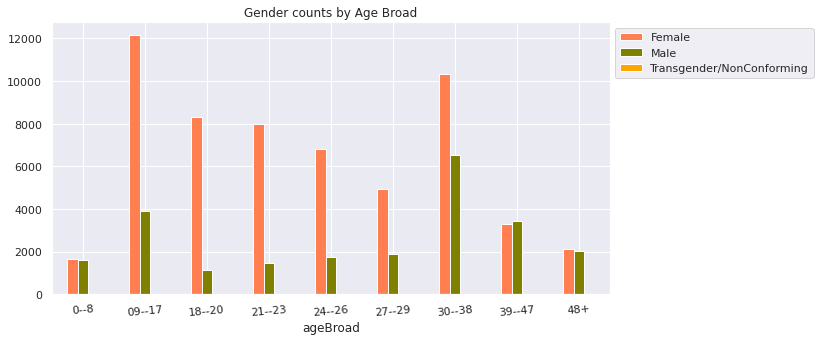

In [55]:
pivot2 = ctdc.pivot_table(index='ageBroad', columns='gender', values='row_num', aggfunc="count")
fig = pivot2.plot(kind="bar", stacked=False, color=["coral","olive","orange"], figsize=(10,5), rot = 5)
plt.title("Gender counts by Age Broad")
fig.legend(bbox_to_anchor = (1, 1))

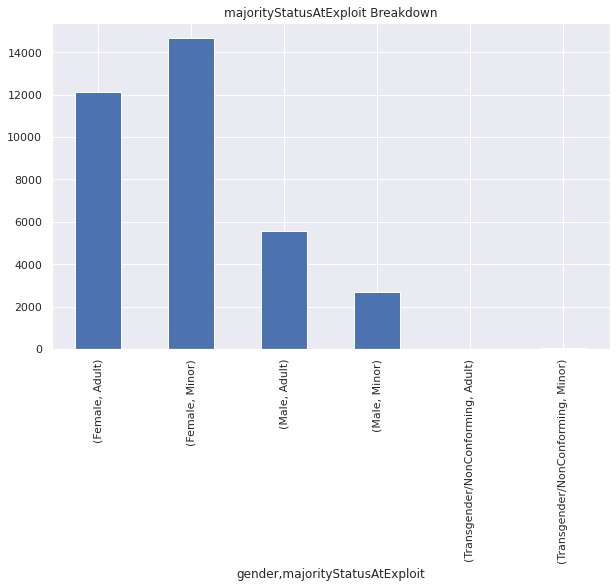

In [56]:
maj_gen_num = ctdc.groupby(['gender', 'majorityStatusAtExploit']).size()
maj_gen_chart = maj_gen_num.plot(kind='bar', title='majorityStatusAtExploit Breakdown',figsize=(10,6))

In [57]:
maj_gen_num_fra = maj_gen_num.to_frame()
maj_gen_num_fra.style.background_gradient(cmap='coolwarm')

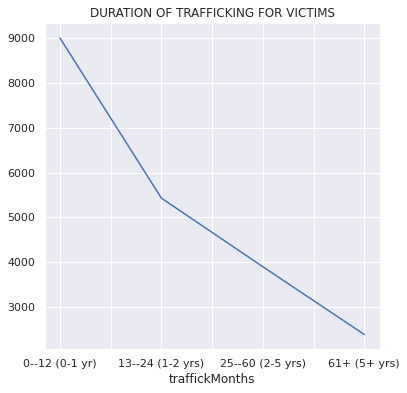

In [58]:
tra_num = ctdc.groupby(['traffickMonths']).size()
tra_chart = tra_num.plot(kind='line', title='DURATION OF TRAFFICKING FOR VICTIMS', figsize = (6, 6))

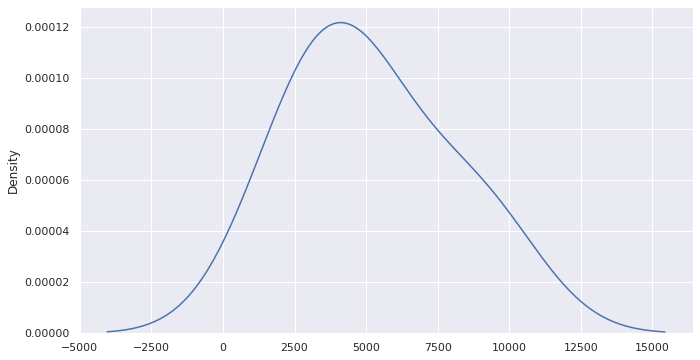

In [59]:
sns.kdeplot(tra_num)

In [60]:
city_num = ctdc.groupby(['citizenship']).size()
city_num_df = pd.DataFrame({'CODE':city_num.index, 'num':city_num.values})
city_num_df

,CODE,num
0,AFG,550
1,ALB,440
2,ARE,20
3,ARG,100
4,ARM,20
...,...,...
123,VNM,780
124,YEM,20
125,ZAF,140
126,ZMB,40


Map chart code source

https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

In [61]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,city_num_df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='num',ascending=False).reset_index()

In [62]:
merge

,index,pop_est,continent,name,CODE,gdp_md_est,geometry,num,latitude,longitude
0,80,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125...",18480,48.379433,31.165580
1,104,104256076,Asia,Philippines,PHL,801900.0,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...",13000,12.879721,121.774017
2,83,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.61934 48.22073, 26.85782 48.36821...",10380,47.411631,28.369885
3,2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",9690,37.090240,-95.712891
4,79,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",4180,53.709807,27.953389
...,...,...,...,...,...,...,...,...,...,...
116,60,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",20,23.424076,53.847818
117,29,360346,North America,Belize,BLZ,3088.0,"POLYGON ((-89.14308 17.80832, -89.15091 17.955...",10,17.189877,88.497600
118,59,10248069,Asia,Jordan,JOR,86190.0,"POLYGON ((35.54567 32.39399, 35.71992 32.70919...",10,30.585164,36.238414
119,23,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",10,8.537981,-80.782127


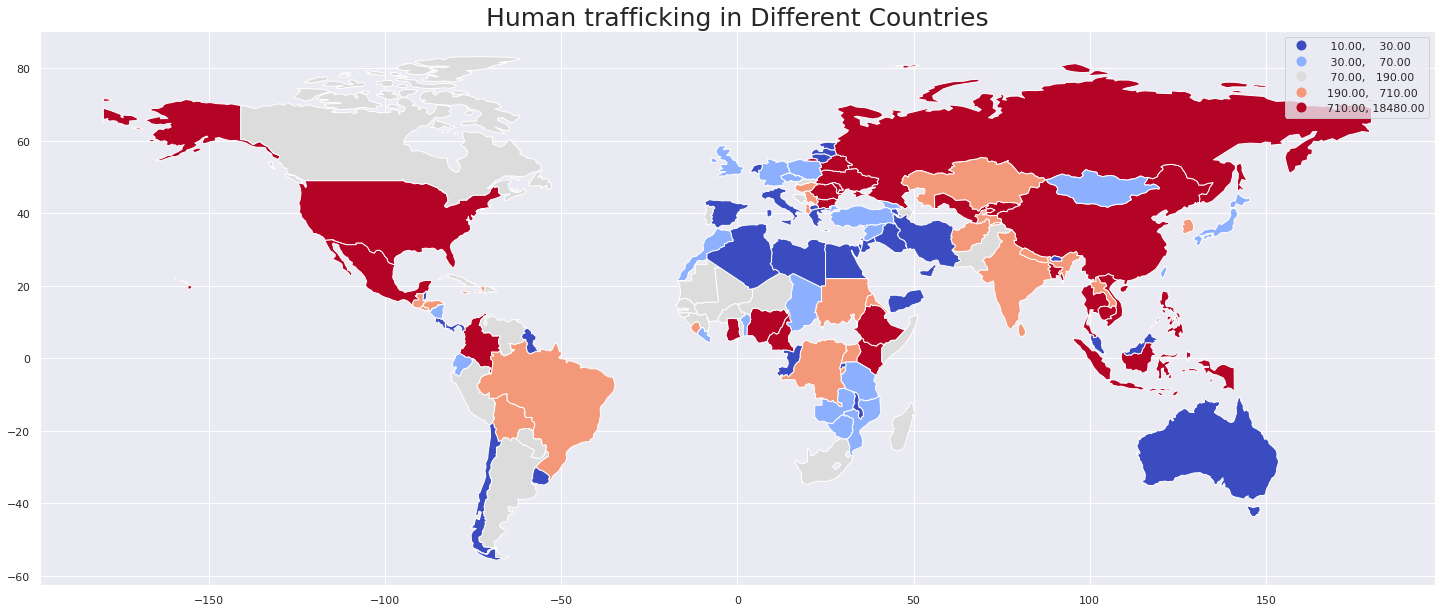

In [63]:
# plot confirmed cases world map 
merge.plot(column='num', scheme="quantiles",
           figsize=(25, 20),
           legend=True,
           cmap='coolwarm')
plt.title('Human trafficking in Different Countries',fontsize=25)
# add countries names and numbers 
#for i in range(0,10):
#   plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.num[i]),size=10)
plt.show()

In [64]:
Cou_ex_num = ctdc.groupby(['CountryOfExploitation']).size()
Cou_ex_num_df = pd.DataFrame({'CODE':Cou_ex_num.index, 'num':Cou_ex_num.values})

In [65]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,Cou_ex_num_df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='num',ascending=False).reset_index()

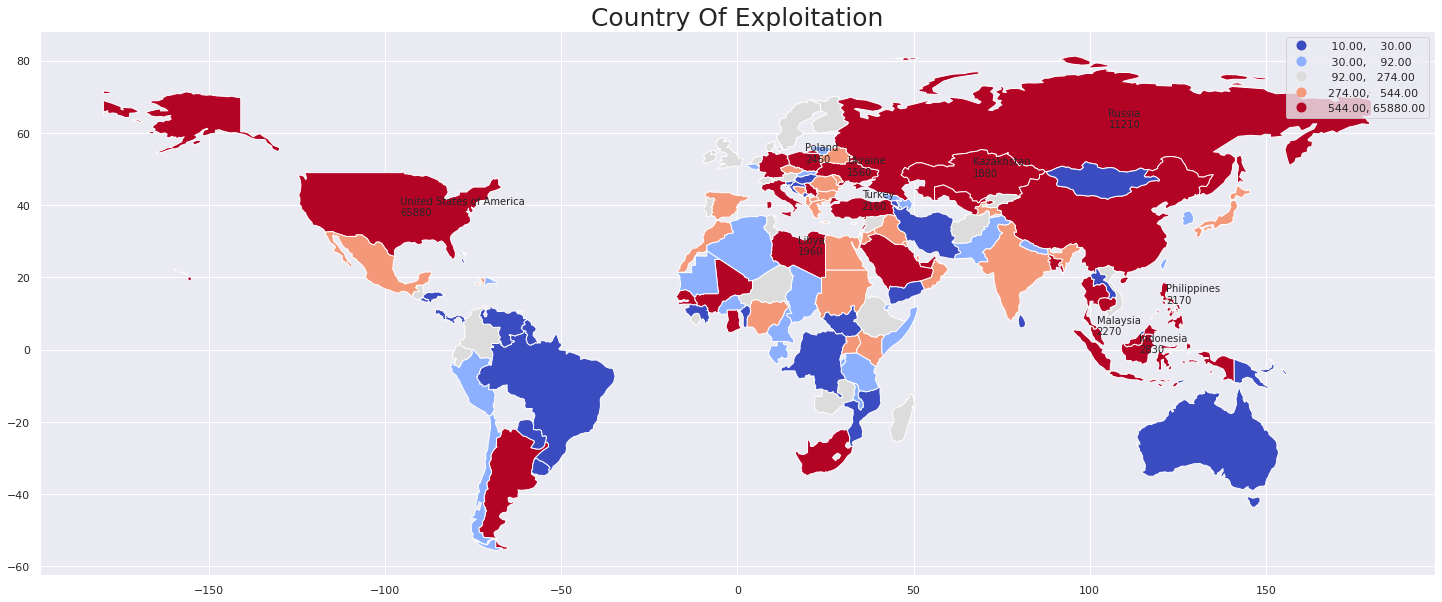

In [66]:
# plot confirmed cases world map 
merge.plot(column='num', scheme="quantiles",
           figsize=(25, 20),
           legend=True,
           cmap='coolwarm')
plt.title('Country Of Exploitation',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.num[i]),size=10)
plt.show()

In [67]:
ctdc = pd.read_csv(project_dir+ 'CTDC.tsv',sep='\t')

In [68]:
feature_names=list(ctdc.columns[7:22])
means_con_num_fra = pd.DataFrame([[f, ctdc[f].dtype, ctdc[f].sum().astype(int)] for f in feature_names], 
              columns=['feature', 'type', 'sum_values'])

Pie chart code source

https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

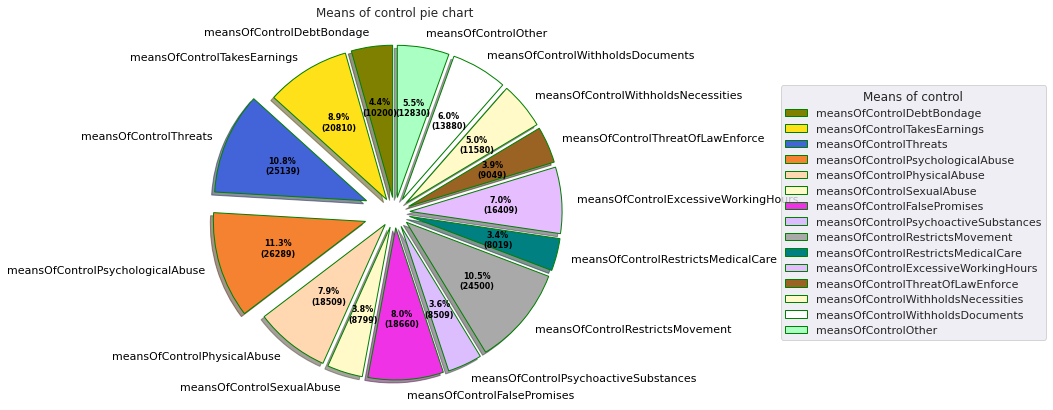

In [69]:
cars = means_con_num_fra.feature
data = means_con_num_fra.sum_values

 # Creating explode data
explode = (0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
 
# Creating color parameters
colors = (
     '#808000', '#ffe119', '#4363d8', '#f58231', '#ffd8b1', '#fffac8', '#f032e6', '#dcbeff', '#a9a9a9', '#008080', '#e6beff', '#9a6324', '#fffac8', '#ffffff', '#aaffc3', '#808000', '#ffd8b1'
 )
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, cars,
          title ="Means of control",
          loc ="center left",
          bbox_to_anchor =(1.5, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Means of control pie chart")
 
# show plot
plt.show()

In [70]:
feature_names=list(ctdc.columns[26:31])
type_lab_num_fra = pd.DataFrame([[f, ctdc[f].dtype, ctdc[f].sum().astype(int)] for f in feature_names], 
              columns=['feature', 'type', 'sum_values'])

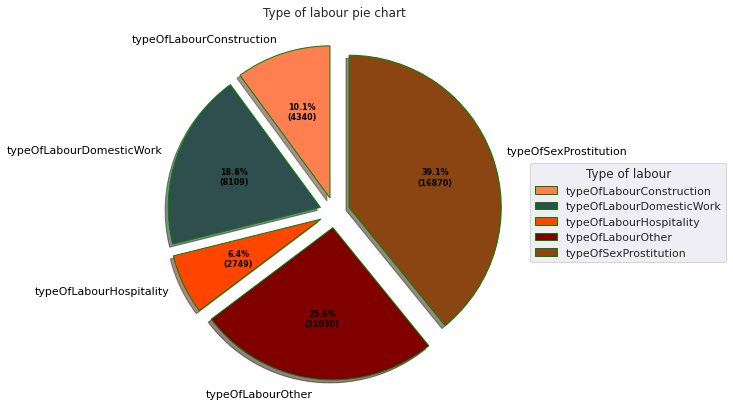

In [71]:
cars = type_lab_num_fra.feature
data = type_lab_num_fra.sum_values

 # Creating explode data
explode = (0.1,0.1,0.1,0.1,0.1)
 
# Creating color parameters
colors = (
    "coral", "darkslategray","orangered","maroon","saddlebrown",
 )
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, cars,
          title ="Type of labour",
          loc ="center left",
          bbox_to_anchor =(1.0, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Type of labour pie chart")
 
# show plot
plt.show()

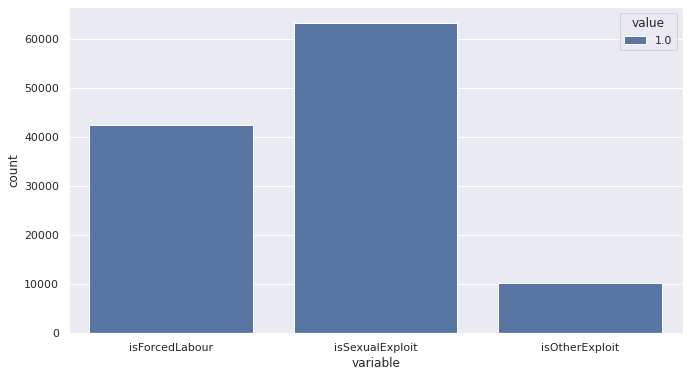

In [72]:
ctdc_1= ctdc.iloc[:,22:25]
sns.set_theme(style="ticks")
sns.set(rc={"figure.figsize":(11,6)}) 
sns.countplot(x="variable", hue="value", data=pd.melt(ctdc_1))

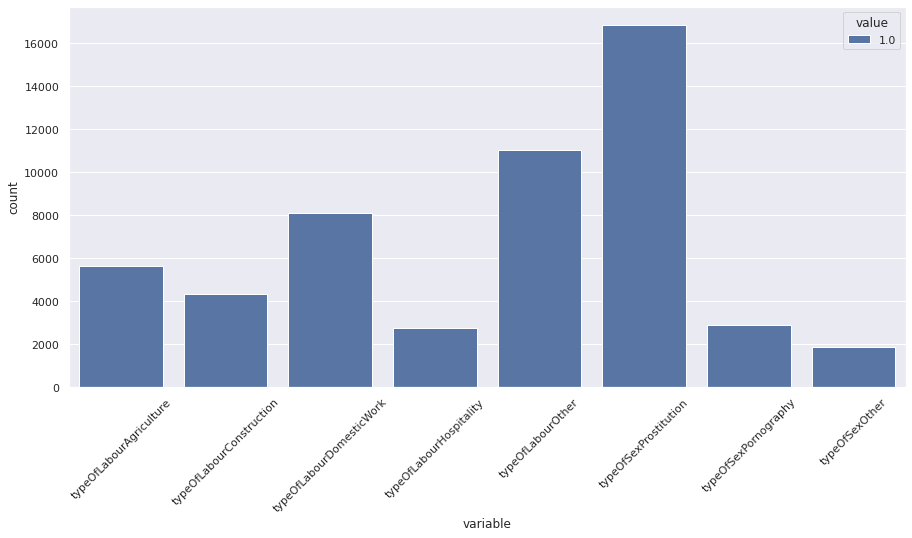

In [73]:
ctdc_1= ctdc.iloc[:,25:33]
sns.set_theme(style="ticks")
sns.set(rc={"figure.figsize":(15,7)}) 
sns.countplot(x="variable", hue="value", data=pd.melt(ctdc_1))
plt.xticks(rotation=45)
plt.show()

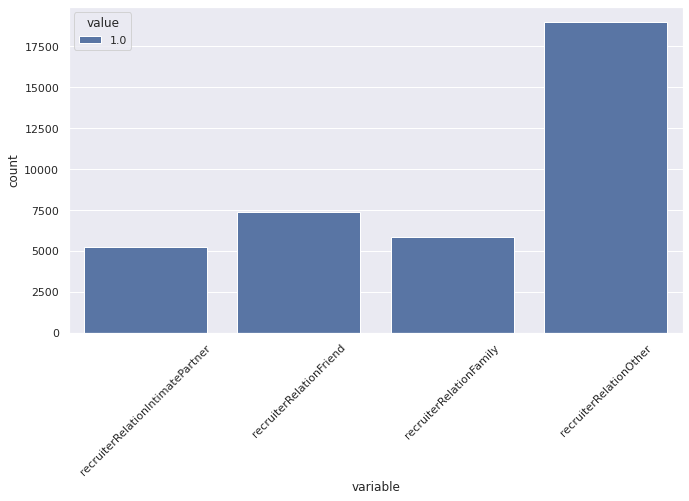

In [74]:
ctdc_1= ctdc.iloc[:,33:37]
sns.set_theme(style="ticks")
sns.set(rc={"figure.figsize":(11,6)}) 
sns.countplot(x="variable", hue="value", data=pd.melt(ctdc_1))
plt.xticks(rotation=45)
plt.show()

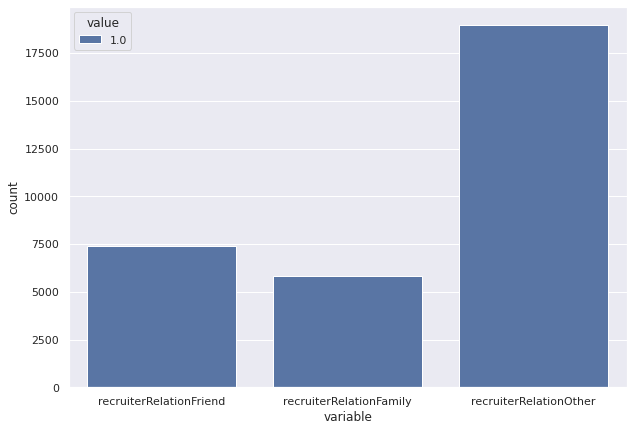

In [75]:
ctdc_1= ctdc.iloc[:,34:38]
sns.set_theme(style="ticks")
sns.set(rc={"figure.figsize":(10,7)}) 
sns.countplot(x="variable", hue="value", data=pd.melt(ctdc_1))